# Descripció del dataset

El dataset sobre el que treballarem és [Titanic:Machine Learning from Disaster](https://www.kaggle.com/c/titanic/data), disponible a Kaggle.

La tragèdia del Titanic és una de les més conegudes de la història: el vaixell RMS Titanic es va enfonsar després de col·lisionar amb un iceberg en el seu primer viatge. Ja que no hi havia suficients bots salvavides per tots els passatgers, el resultat de la tragèdia va ser la mort de 1502 dels 2224 passatgers i membres de la tripulació total que viatjava al vaixell.

Tot i que la sort va estar involucrada en el fet de sobreviure, si estudiem les dades dels passatgers, podem veure que hi havia grups de persones amb més probabilitats de sobreviure que d'altres.

Per tant, l'objectiu de l'anàlisi d'aquest dataset és trobar les característiques (edat, sexe, classe social, etc.) dels grups de persones que van sobreviure a la tragèdia i comparar-les amb les de les persones que van morir. En definitiva, la pregunta que volem respondre amb aquestes dades és **"Quines característiques van fer que un passatger tingués més probabilitats de sobreviure a la tragèdia?"**.

La importància d'aquestes dades resideix en què un cop coneixem les característiques de les persones amb més probabilitat de sobreviure, el següent pas serà crear un model predictiu que ens retorni si una persona va sobreviure o no a l'enfonsament donats els seus atributs. Aquest anàlisi ens permetrà connéixer millor la societat de la època i comprendre més a fons com va esdevenir la tragèdia del Titanic.


Aquest dataset està format per 12 atributs:

* **Age**: edat del passatger en anys. `(nombre sencer)`

* **Cabin**: codi de la cabina, en format text, ja que està compost per lletres i números. `(text)`

* **Embarked**: port on va embarcar el passatger al vaixell. És un camp categòric d'una sola lletra codificat de la següent manera: C = Cherbourg, Q = Queenstown, S = Southampton. `(text)`

* **Fare**: tarifa del passatger en format nombre flotant. `(nombre flotant)`

* **Name**: nom i cognoms del passatger. `(text)`

* **Parch**: nombre de parents / fills a bord del vaixell. `(nombre sencer)`

* **PassengerId**: identificador del passatger. `(nombre sencer)`

* **Pclass**: classe en què viatjava el passatger. És un camp categòric codificat de la següent manera: 1 = Primera classe, 2 = Segona classe, 3 = Tercera classe. `(nombre sencer)`

* **Sex**: sexe del passatger, que pot ser Male o Female. `(text)`

* **SibSp**: nombre de germans / cònjuges a bord del vaixell. `(nombre sencer)`

* **Ticket**: codi del tiquet del passatger, en format text, ja que està compost per lletres i números. `(text)`

* **Survived**: l'atribut que es vol predir amb aquestes dades. Indica si un passatger va sobreviure o no a la tragèdia, i està codificat de forma que 0 significa que no va sobreviure i 1 significa que sí. `(nombre sencer)`

Per últim, abans de començar l'anàlisi i processament de les dades, importarem a continuació totes les llibreries necessàries:


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

# Integració i selecció de les dades

## Integració

El primer pas serà llegir les dades dels fitxers CSV. Ja que les dades estan destinades a una competició de Machine Learning, aquestes vénen separades en un fitxer `train.csv` i un fitxer `test.csv`. Ja que nosaltres volem analitzar les dades, només haurem de llegir el fitxer `train.csv`, ja que el fitxer `test.csv` no contindrà la informació de la variable objectiu **Survived** i no podrem saber si els passatgers d'aquestes dades van sobreviure o no. Per tant, la integració de les dades simplement consistirà en la lectura del fitxer següent:


In [2]:
# Llegim el fitxer train.csv i mostrem les 5 primeres files
path_train = "../data/original/train.csv"
df = pd.read_csv(path_train)

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


També podem mirar el nombre de files que conté el dataset:

In [3]:
df.shape[0]

891

## Selecció

El següent pas serà seleccionar quines dades seran adients per la nostra anàlisi. Ja que el nostre objectiu és detectar quines característiques són les que van fer que una persona tingués més probabilitats de sobreviure, no té sentit seleccionar un conjunt de dades específic (filtrat per l'edat per exemple), ja que volem estudiar el conjunt sencer de passatgers.

Tot i això, es pot donar el cas de tenir columnes que no ens aportin informació per l'objectiu d'anàlisi que tenim. Per exemple, el nom del passatger o el codi del tiquet no ens aporten informació significativa sobre el passatger. En definitiva, les dades de tipus text no ens aportaran informació valuosa específicament en aquest problema, així que mirarem a continuació de quin tipus és cadascun dels atributs, per poder descartar o seleccionar les columnes valuoses per l'anàlisi:

In [4]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

El tipus `object` és el que indica que un camp pot contenir text. En aquest cas, les columnes Cabin, Name i Ticket no ens podran aportar informació valuosa, així que les traurem del nostre conjunt de dades. La columna PassengerId, tot i ser numèrica, tampoc ens aporta informació significativa del passatger, així que també l'eliminarem.

Per altra banda, els camps Sex i Embarked, tot i ser de tipus text, estan representant informació categòrica, així que ens poden aportar informació valuosa per l'anàlisi. Per tal de poder utilitzar aquesta informació haurem de transformar aquestes dues columnes a variables de tipus categòrica.

Realitzarem aquestes transformacions després de la detecció de valors buits per tal de no afegir categories incorrectes a les nostres dades.

# Neteja de les dades
## Elements buits

Un dels punts més importants de la neteja de les dades és la detecció de valors buits, ja que poden provocar errors en la nostra anàlisi. Existeixen diferents alternatives per solucionar la pèrdua de dades. Si la informació és coneguda i suposa una inversió de temps acceptable es recomana completar-les de forma manual. Com que aquest no sol ser el cas, també podem substituir les dades buides per una etiqueta constant, per un càlcul estadístic que representi la tendència central de la columna o utilitzant mètodes estadístics més complexos. Per últim, també es poden omplir els valors buits utilitzant models per predir els valors faltats.

En definitiva, en el cas de les dades del Titanic podrem seguir dues estratègies: omplir els registres buits amb un valor concret, que pot ser calculat a partir de les altres files o constant, o eliminar les files que els contenen.

Analitzem a continuació si el nostre conjunt de dades conté valors buits:


In [5]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Com podem observar, els camps Age, Cabin i Embarked contenen valors buits. La columna Cabin ja hem decidit eliminar-la pel tipus d'informació que conté, però veient el gran nombre de valors buits que presenta també hauríem d'eliminar-la per aquest motiu.

Per altra banda, podem omplir els valors buits presents a les columnes Age i Embarked a partir de realitzar una operació estadística adient sobre els altres valors de la columna per obtenir-ne el valor central. És important escollir l'operació estadística que tingui més sentit respecte al que representa cada columna.

En el cas de l'edat, l'operació més adient per omplir els valors buits serà la mediana, ja que estarem agafant el valor central de les edats de la columna. D'aquesta forma obtindrem una edat més representativa de la població present a les nostres dades i no tindrem nombres decimals en aquest camp.

Per altra banda, per la columna Embarked utilitzarem la moda, per omplir els pocs valors buits amb la categoria que més aparegui entre els valors de la columna.

In [6]:
# Omplim els valors buits
df["Age"].fillna(df["Age"].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

Per últim, eliminarem i transformarem a categòriques les columnes que hem especificat a l'apartat de Selecció:

In [7]:
# Eliminen PassengerId, Cabin, Name i Ticket del conjunt de dades
df = df.drop(["PassengerId", "Name", "Ticket", "Cabin"], axis=1)

# Convertim Sex i Embarked a variable categòrica
df['Sex'] = pd.Categorical(df['Sex'])
df['Sex'] = df['Sex'].cat.codes

df['Embarked'] = pd.Categorical(df['Embarked'])
df['Embarked'] = df['Embarked'].cat.codes

Si ara tornem a fer la comprovació dels valors buits, veurem que no en tenim cap:

In [8]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

## Valors extrems

Els valors extrems (o outliers) són aquelles dades que es troben molt allunyades de la distribució normal d'una variable. Són observacions que s'allunyen tant de la resta que poden afectar negativament els resultats de la nostra anàlisi. Per aquest motiu és important analitzar i detectar si les nostres dades presenten valors extrems.

A les nostres dades tenim variables numèriques i variables categòriques. Per les variables categòriques no existeix el concepte de valor extrem com a tal, ja que simplement tenim tantes etiquetes com categories presentin les dades. Per tant, solament haurem de comprovar que no presentin outliers les variables numèriques contínues.

A l'apartat anterior hem comprovat els tipus de cadascun dels atributs, així que podem classificar-los entre si són categòrics o numèrics:

* **Categòrics:** Survived, Pclass, Sex, Embarked

* **Numèrics:** Age, Fare, SibSp, Parch

Les columnes SibSp i Parch, que indiquen el nombre de germans/cònjuges i pares/fills respectivament, tot i ser numèriques no són contínues perquè només presenten valors sencers. Per tant, solament analitzarem les columnes Age i Fare per cercar si presenten outliers.

Utilitzarem dos mètodes diferents per detectar els outliers: **IQR** i **Z-Score**.

### IQR (Inter-Quartile Range)

El rang interquartílic (o IQR) és una estimació estadística de la dispersió i distribució de les dades, que consisteix en la diferència entre el tercer i primer quartil.

$$ IQR = Q_{3} - Q_{1}$$

A partir d'aquest càlcul es poden calcular els bigotis mínim i màxim. D'aquesta manera, tots els valors que es trobin fora d'aquests rangs seran considerats outliers. Els rangs dels bigotis es calculen amb les següents fórmules:

$$ Mínim = Q_{1} - 1.5 · IQR $$

$$ Màxim = Q_{3} + 1.5 · IQR $$

Aquesta informació se sol representar utilitzant boxplots, així que el nostre primer pas serà mostrar un boxplot pels nostres atributs numèrics continus per detectar si contenen outliers:

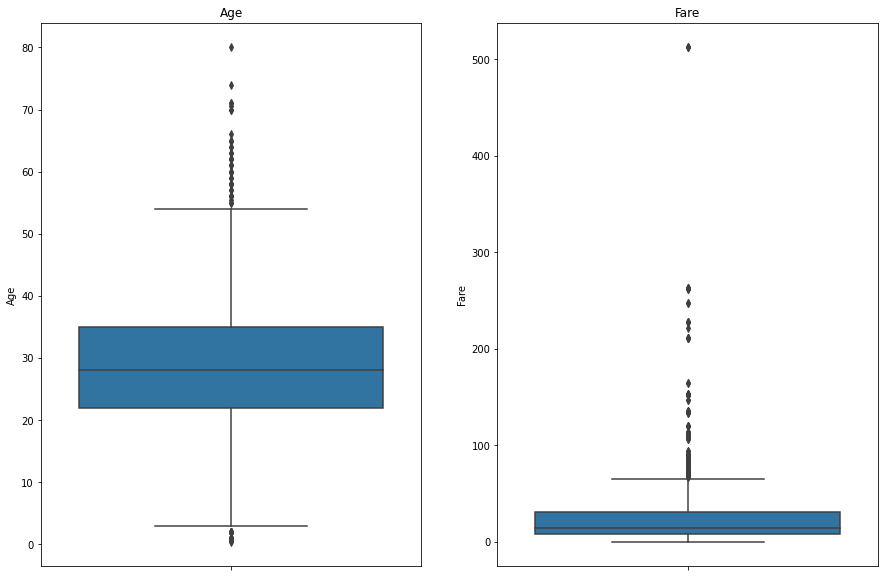

In [9]:
# Mostrem boxplots de les diferents columnes
fig, axs = plt.subplots(1, 2, figsize=(15,10))

sns.boxplot(y=df['Age'], ax=axs[0])
axs[0].set_title("Age")
sns.boxplot(y=df['Fare'], ax=axs[1])
axs[1].set_title("Fare")
plt.show()

Com podem observar en els dos gràfics, totes dues columnes presenten valors extrems. Per la columna `Age`, sembla que l'edat predominant es trobava al voltant dels 30 anys, i que la majoria de persones es troben en un rang d'edat d'entre 3 i 55 anys. Per tant, les persones fora d'aquest rang d'edat es consideraran outliers.

Per altra banda, per la columna `Fare`, el preu del tiquet va ser generalment baix, però hi va haver passatgers que van pagar molts diners pels seus tiquets. Aquests valors també seran considerats outliers.

Per tant, a continuació eliminarem els valors extrems de les columnes Age i Fare:

In [10]:
# Eliminem  els outliers utilitzant IQR
# 1. Outliers de la columna Age
Q1_age = df['Age'].quantile(0.25)
Q3_age = df['Age'].quantile(0.75)
IQR_age = Q3_age - Q1_age

filter_age = (df['Age'] >= Q1_age - 1.5 * IQR_age) & (df['Age'] <= Q3_age + 1.5 *IQR_age)
df_iqr = df.loc[filter_age] 

# 2. Outliers de la columna Fare
Q1_fare = df['Fare'].quantile(0.25)
Q3_fare = df['Fare'].quantile(0.75)
IQR_fare = Q3_fare - Q1_fare

filter_fare = (df['Fare'] >= Q1_fare - 1.5 * IQR_fare) & (df['Fare'] <= Q3_fare + 1.5 *IQR_fare)
df_iqr = df_iqr.loc[filter_fare] 

# Nombre de files restants després d'eliminar outliers
print("Files originals: " + str(df.shape[0]))
print("Files sense outliers: " + str(df_iqr.shape[0]))

Files originals: 891
Files sense outliers: 721


Utilitzant aquest mètode per l'eliminació d'outliers hem hagut d'eliminar un total de 170 files. Aquest nombre és significativament gran respecte el total de files presents al dataset, ja que el mètode IQR és un mètode molt agressiu en l'eliminació de valors extrems. Per tant, anem podem provar a continuació el mètode Z-score, que depèn de la mitjana i desviació estàndard de les dades.

### Z-Score

De forma molt resumida, el Z-score dóna una idea de com de lluny es troba un punt de la mitjana de les dades. Més tècnicament, és una mesura de quantes desviacions estàndards per sobre o sota es troba el punt de la mitjana de la població.

El Z-score pot prendre valors des de -3 fins a +3 per les desviacions estàndard. La forma d'identificar valors extrems amb aquest mètode és calculant el Z-score, redimensionant el centre de les dades i identificar els punts que es trobin molt allunyats del 0. Normalment s'utilitza un rang d'entre -3 i 3 pels valors normals, i si el z-score és menor o major que aquests valors, la mostra es considerarà un outlier.

En el nostre cas utilitzarem la funció definida a la llibreria `scipy` per detectar els outliers.


In [11]:
# Calculem la Z-Score per Age i Fare
df_age_fare = df[{'Age', 'Fare'}]
df_zscores = df_age_fare.apply(stats.zscore)

# Eliminem les files amb valors extrems
filter_zscore = np.abs(df_zscores) < 3
df_zscore = df[filter_zscore.all(axis=1)]

# Nombre de files restants després d'eliminar outliers
print("Files originals: " + str(df.shape[0]))
print("Files sense outliers: " + str(df_zscore.shape[0]))

Files originals: 891
Files sense outliers: 864


Com podem veure, en aquest cas hem eliminat 27 valors extrems. Per veure gràficament com afecta l'eliminació dels valors extrems a les nostres dades, a continuació mostrarem la distribució dels atributs Age i Fare abans i després d'eliminar els outliers.

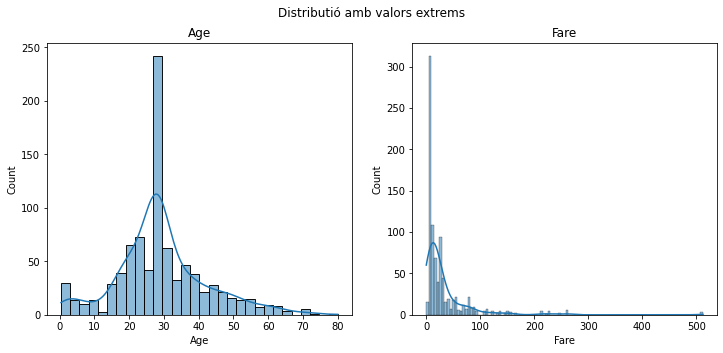

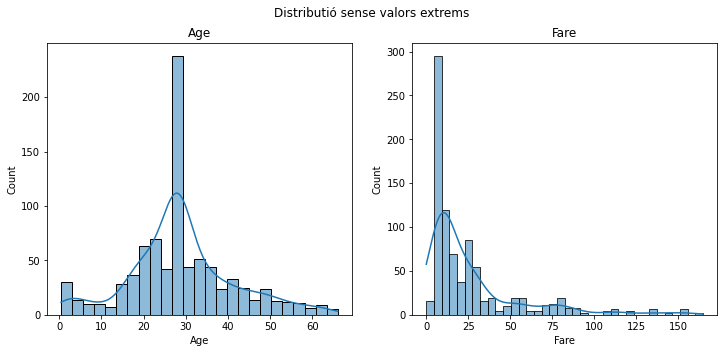

In [12]:
# Mostrem les distribucions d'Age i Fare abans i després
# 1. Abans d'eliminar els outliers
fig, axs = plt.subplots(1, 2, figsize=(12,5))
sns.histplot(df['Age'], ax=axs[0], kde=True)
axs[0].set_title("Age")
sns.histplot(df['Fare'], ax=axs[1], kde=True)
axs[1].set_title("Fare")
fig.suptitle("Distributió amb valors extrems")


# 2. Després d'eliminar els outliers
fig, axs = plt.subplots(1, 2, figsize=(12,5))
sns.histplot(df_zscore['Age'], ax=axs[0], kde=True)
axs[0].set_title("Age")
sns.histplot(df_zscore['Fare'], ax=axs[1], kde=True)
axs[1].set_title("Fare")
fig.suptitle("Distributió sense valors extrems")

plt.show()

Com podem observar als histogrames anteriors, s'han eliminat els valors dels extrems de les distribucions i les nostres dades ja no presenten outliers.

Per tant, a partir d'ara utilitzarem les dades sense outliers, eliminant aquests amb el mètode del Z-score:

In [13]:
df = df_zscore

# Anàlisi de les dades

## Selecció dels grups de dades a analitzar

El principal objectiu de la nostra anàlisi és descobrir quines característiques van fer que un passatger tingués més probabilitats de sobreviure. Per tant, principalment dividirem les dades entre persones que van sobreviure i persones que no.

Farem diferents anàlisis per descobrir si el sexe, la classe social o l'edat de la persona van influir en les seves probabilitats de supervivència. Per tant, també dividirem les dades entre homes i dones, per classe en què es viatjava (primera, segona o tercera) i per si es viatjava en familia. L'edat, ja que és una variable numèrica continua, la podem utilitzar sense necessitat de dividir les dades per diferents rangs, tot i que podríem fer una divisió entre nens, joves, adults i gent gran.

Tot i fer aquestes divisions en les dades, pot ser que no totes les particions s'utilitzin a les proves estadístiques dels següents apartats.

In [14]:
# Divisió de les dades 
# 1. Criteri = supervivència
survived = df[df['Survived'] == 1]
not_survived = df[df['Survived'] == 0]

# 2. Criteri = sexe
male = df[df['Sex'] == 1]
female = df[df['Sex'] == 0]

# 3. Criteri = classe del tiquet
class_1 = df[df['Pclass'] == 1]
class_2 = df[df['Pclass'] == 2]
class_3 = df[df['Pclass'] == 3]

# 4. Criteri = edat
children = df[df['Age'] < 15]
young = df[(df['Age'] >= 15) & (df['Age'] < 30)]
adult = df[(df['Age'] >= 30) & (df['Age'] < 60)]
elderly = df[df['Age'] >= 60]

# 5. Criteri = familia
family = df[(df['Parch'] >= 1) | (df['SibSp'] >=1)]
alone = df[(df['Parch'] == 0) & (df['SibSp'] == 0)]

## Comprovació de la normalitat i homogeneïtat de la variància

### Comprovació de la normalitat
Per comprovar que els valors de les nostres variables numèriques provenen d'una població amb una distribució normal, utilitzarem la prova de normalitat de Shapiro-Wilk. Aquest mètode sol funcionar amb poques mostres, així que solament utilitzarem les primeres 50 mostres de les dades.

L'objectiu d'aquesta prova és comprovar que s'obté un p-valor superior al nivell de significació alpha prefixat. Si aquesta condició es compleix es considera que la variable té una distribució normal.

In [15]:
# Test de normalitat de Shapiro-Wilk
for col in df:
    print(df[col].name)
    stat, p = stats.shapiro(df[col].head(50))
    print('Statistics=%.3f, p=%.3f' % (stat, p))
    # interpret
    alpha = 0.01
    if p > alpha:
        print('YES - Sample looks Gaussian (fail to reject H0)\n')
    else:
        print('NO  - Sample does not look Gaussian (reject H0)\n')
    

Survived
Statistics=0.632, p=0.000
NO  - Sample does not look Gaussian (reject H0)

Pclass
Statistics=0.649, p=0.000
NO  - Sample does not look Gaussian (reject H0)

Sex
Statistics=0.637, p=0.000
NO  - Sample does not look Gaussian (reject H0)

Age
Statistics=0.941, p=0.015
YES - Sample looks Gaussian (fail to reject H0)

SibSp
Statistics=0.688, p=0.000
NO  - Sample does not look Gaussian (reject H0)

Parch
Statistics=0.407, p=0.000
NO  - Sample does not look Gaussian (reject H0)

Fare
Statistics=0.656, p=0.000
NO  - Sample does not look Gaussian (reject H0)

Embarked
Statistics=0.685, p=0.000
NO  - Sample does not look Gaussian (reject H0)



A més de realitzar aquest test, moltes vegades la forma més senzilla de detectar si una variable té una distribució normal és visualitzant el seu histograma. A més, moltes vegades, tot i no tenir una distribució normal perfecta, les dades també poden presentar una distribució normal aproximada. Mostrem a continuació els histogrames de les nostres variables:

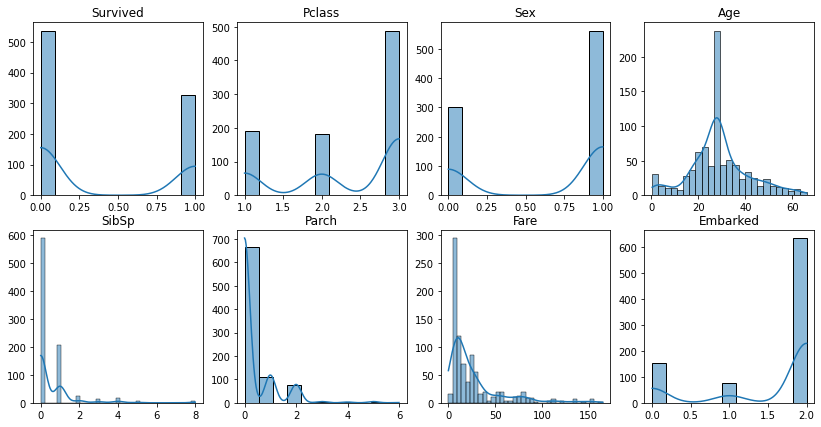

In [16]:
# Histogrames de les nostres variables
fig, axs = plt.subplots(2,4, figsize=(14,7))
columns = df.columns

for i in range(len(axs)):
    for j in range(len(axs[i])):
        col = columns[i*4 + j]
        data = df[col]
        g = sns.histplot(data, kde=True, ax=axs[i,j])
        g.set_title(col)
        axs[i,j].set_xlabel('')
        axs[i,j].set_ylabel('')
        
plt.show()    

Com podem observar, la variable Age és la única que compleix les dues condicions de normalitat, i la variable Fare és aproximadament una normal visualment, pero no compleix el test de Shapiro-Wilk.

### Homogeneïtat de la variància

Ja que la majoria de les variables no compleixen la condició de normalitat, per comprovar l'homogeneïtat de la variància utilitzarem el test de Fligner-Killeen. En aquest test la hipòtesi nul·la assumeix igualtat de variàncies en els diferents
grups de dades, de manera que p-valors inferiors al nivell de significació indicaran heteroscedasticitat.

En el nostre cas comprovarem l'homogeneïtat de la variància en el grup de persones de diferents edats, de diferent sexe i depenent de si viatjaven sols o en familia:

In [17]:
# Test de Fligner-Killeen
stat, p = stats.fligner(children['Survived'], young['Survived'], adult['Survived'], elderly['Survived'])
print("Age")
print(stat, p)

print("\nSex")
stat, p = stats.fligner(male['Survived'], female['Survived'])
print(stat, p)

print("\nFamily")
stat, p = stats.fligner(alone['Survived'], family['Survived'])
print(stat, p)

Age
5.481923696249697 0.13972378689691659

Sex
7.330742420420205 0.006778504944699884

Family
26.835441015989357 2.2153702115704767e-07


Com podem veure als resultats del test, la variància de les diferents mostres separades per edat són homogènies, ja que el p-valor és major a 0.05, mentre que les mostres separades per sexe i per familia no són homogènies, ja que el p-valor és menor a 0.05.

## Proves estadístiques

### Quines característiques van fer que una persona tingués més probabilitats de sobreviure?

En primer lloc, farem un estudi de les correlacions entre les variables de les nostres dades per veure si hi ha algun factor relacionat amb el fet de sobreviure o no:


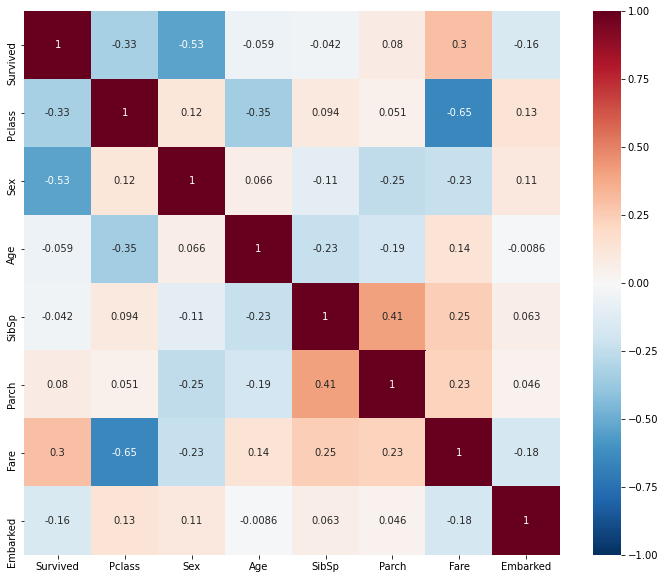

In [18]:
# Mostrem una matriu de correlacions
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), center=0, annot=True, vmin=-1, vmax=1, cmap="RdBu_r")
plt.show()

Com podem veure, tant la classe del tiquet (`Pclass`) com el sexe del passatger (`Sex`) estan inversament correlacionats amb el fet de sobreviure (`Survived`). 

Altres correlacions interessants que podem observar en aquesta matriu de correlacions és que el preu del tiquet (`Fare`) està altament inversament correlacionat amb la classe en que es viatjava (`Pclass`), ja que com més alt sigui el preu, la classe serà millor (més petita). També podem observar que el fet de tenir fills/pares al vaixell (`Parch`) està correlacionat amb el fet de tenir conjuges/germans al vaixell (`SibSp`), fet que ens mostra la presència de families entre els passatgers d'aquestes dades.

Tenint aquesta primera imatge, podem fer un anàlisi més en detall de com van afectar l'edat, el sexe i la classe en que es viatjava al fet de sobreviure. Una bona forma de comprovar això és mostrant les distribucions d'aquestes variables respecte el fet de sobreviure:

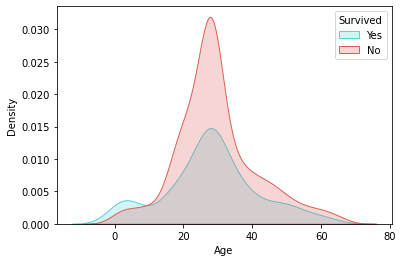

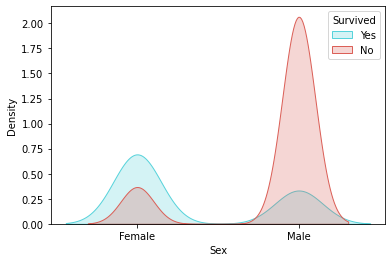

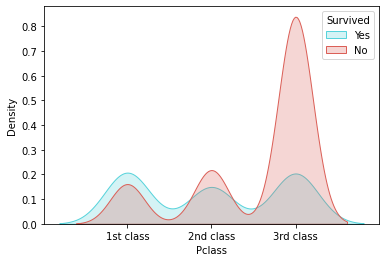

In [19]:
# Estudi de l'edat
g = sns.kdeplot(data=df, x="Age", hue="Survived", fill=True, palette='hls')
g.legend(title='Survived', loc='upper right', labels=['Yes', 'No'])
plt.show()

# Estudi del sexe
g = sns.kdeplot(data=df, x="Sex", hue="Survived", fill=True, palette='hls')
g.set_xticks([0,1])
g.set_xticklabels(['Female', 'Male'])
g.legend(title='Survived', loc='upper right', labels=['Yes', 'No'])
plt.show()

# Estudi de la classe
g = sns.kdeplot(data=df, x="Pclass", hue="Survived", fill=True, palette='hls')
g.set_xticks([1,2,3])
g.set_xticklabels(['1st class', '2nd class', '3rd class'])
g.legend(title='Survived', loc='upper right', labels=['Yes', 'No'])
plt.show()

D'aquestes 3 gràfiques podem extreure conclusions molt interessants.

En primer lloc, pel que fa a l'edat es pot observar que els nens de fins a 15 anys van tenir lleugerament més probabilitat de sobreviure que altres franges d'edat.

Per altra banda, pel que fa al sexe, es pot observar clarament que les dones van tenir molta més probabilitat de sobreviure a la tragèdia. 

Per últim, en el gràfic que mostra la classe en que viatjaven els passatgers podem observar que van morir moltes més persones que viatjaven en tercera classe, i per tant eren més pobres, que persones que viatjaven en primera i segona classe, i per tant tenien més diners.

D'aquestes tres conclusions podem afirmar que les característiques que van fer que tinguessis més probabilitats de sobreviure a la tragèdia del Titanic van ser el fet de ser una dona, un nen o ric.

### Les persones que viatjaven amb la seva família tenien més probabilitats de sobreviure?

La segona prova estadística que realitzarem consistirà en el contrast d'hipòtesis sobre dues mostres per determinar si el fet de viatjar amb familiars va estar relacionat amb la supervivència d'un passatger.

Per fer això tindrem dues mostres: la primera de les persones que viatjaven soles i la segona amb aquelles persones que tenien membres de la família al vaixell (germans/cònjuges o fills/pares).

Ja que els dos grups de dades no compleixen les condicions de normalitat ni homogeneïtat, haurem d'utilitzar proves no paramètriques. Ja que els nostres grups de dades són independents, utilitzarem el test de Mann-Whitney. Perquè aquest test sigui efectiu, és necessari que hi hagi més de 20 observacions a cada mostra:

In [20]:
print(alone.shape)
print(family.shape)

(524, 8)
(340, 8)


L'assumpció per defecte o hipòtesi nul·la és que no hi ha diferència entre les distribucions de les dues mostres. El rebuig de la hipòtesi nul·la ens indica que hi ha alguna diferència entre les dues mostres. Per tant, si rebutgem la hipòtesi significarà que hi ha diferència entre les mostres i per tant sí que afectaria el fet de viatjar sol o en família. En canvi, si acceptem la hipòtesi significarà que aquest aspecte no és rellevant per la supervivència d'un passatger.

In [21]:
# Test de Mann-Whitney
stat, p = stats.mannwhitneyu(family['Survived'], alone['Survived'])
print('Statistics=%.3f, p=%.3f' % (stat, p))

alpha = 0.05
if p > alpha:
    print('Same distribution (fail to reject H0)')
else:
    print('Different distribution (reject H0)')

Statistics=71230.000, p=0.000
Different distribution (reject H0)


Com podem veure, hem rebutjat la hipòtesi nul·la, així que podem afirmar que les persones que viatjaven en família tenien més probabilitats de sobreviure.

Si analitzem aquesta conclusió des d'un punt de vista social ens podem adonar que està directament relacionat amb el fet de ser una dona o un nen, característiques que ja hem analitzat al punt anterior. En aquella època, les persones que principalment viatjaven en família eren tant les dones com els nens, mentre que hi havia més homes viatjant sols. Per tant, hem descobert que el fet de viatjar amb família implica tenir més probabilitats de sobreviure a la tragèdia i que aquest fet està implícitament relacionat ser una dona o un nen, característiques que ja sabem que donaven més probabilitats de sobreviure.


### Model de classificació

Per acabar, l'última prova que farem serà predir amb les dades que hem processat si una persona va sobreviure o no a la tragèdia utilitzant un model de classificació.

Després de les anàlisis de correlació i hipòtesis que hem realitzat als apartats anteriors, ara podrem comprovar la importància que un model de classificació dóna a cadascuna de les diferents features que tenim a les dades. Per tant, amb aquesta prova no serà important l'accuracy, ja que solament farem un entrenament per veure com el RandomForest dóna importància als diferents atributs.

Utilitzarem un model de tipus RandomForest per obtenir aquestes importàncies:

In [22]:
from sklearn.ensemble import RandomForestClassifier

# 1. Separem les dades entre train i test
y_train = df["Survived"]
X_train = df.drop(["Survived"], axis=1)

# 2. Entrenem el RandomForest
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train)

# 3. Mostrem l'accuracy de l'entrenament
print(rf.score(X_train, y_train))

0.9791666666666666


Els models de tipus RandomForest ens permeten analitzar la importància dels diferents atributs en el fet de sobreviure o no. Ens guardarem la importància que el model ha donat a cadascuna de les features i ho mostrarem en un gràfic per entendre-ho millor:

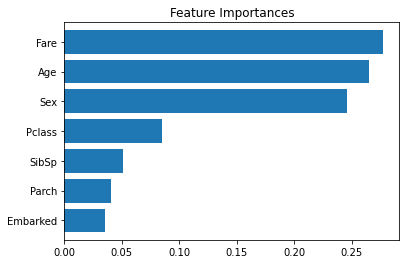

In [23]:
# Plot de les importàncies de les features pel RandomForest
pd.Series(rf.feature_importances_, X_train.columns).sort_values(ascending=True)\
    .plot.barh(width=0.8, ax=plt.gca())
plt.title('Feature Importances')
plt.show()

Com podem comprovar analitzant les importàncies de les features del model, els atributs que han sigut més determinants a l'hora de classificar si una persona va sobreviure o no han sigut el `Fare`, `Age` i `Sex`. Aquest resultat no s'allunya del descobert pel primer anàlisi de correlacions.

De fet, ja que el `Fare` està altament correlacionat amb la `Pclass`, les nostres conclusions segueixen sent les mateixes: les dones, nens i rics van tenir més probabilitats de sobreviure. 

# Representació dels resultats

Durant tot aquest document ja s'han presentat les taules i gràfiques realitzades per cadascuna de les diferents anàlisis.

# Resolució del problema

L'objectiu d'analitzar les dades del Titanic era descobrir quines característiques presentaven les persones que van sobreviure i comprovar si aquestes estaven relacionades amb la supervivència.

Amb els resultat de les diferents anàlisis elaborades hem pogut respondre al nostre problema, del qual podem veure'n les conclusions finals a continuació:

* Els passatgers amb menys de 15 anys van tenir una major probabilitat de sobreviure.

* Van sobreviure gairebé el doble de dones que d'homes.

* Les persones riques que viatjaven amb un tiquet de millor classe van tenir moltes més probabilitats de sobreviure que les persones amb tiquets de tercera classe.

* El fet de viatjar amb la família està relacionat directament amb què el passatger sigui una dona o un nen, així que també incrementa la probabilitat de sobreviure.

Per tant, el que hem descobert analitzant aquestes dades és que les **dones**, **nens** i **rics** van tenir prioritat a l'hora de pujar als bots salvavides i per tant, més probabilitats de sobreviure.

Per últim, guardem les dades que hem netejat i analitzat a la carpeta `/data/processed`:

In [24]:
# Guardem les dades processades
path = '../data/processed/'
filename = 'titanic_train_processed.csv'
df.to_csv(path + filename, index="False")

# Entrega i contribucions
El lliurament d'aquesta pràctica consta de: 

1. Wiki explicant els diferents fitxers del projecte. Es pot accedir al codi font d'aquest projecte en aquest [enllaç](https://github.com/LauraPlanas/Titanic-Dataset-Analysis).

2. Aquest document (PDF) que ha sigut generat a partir d'una Jupyter Notebook amb les respostes a les preguntes de la pràctica i el propi codi font per resoldre-les.

3. El codi font d'aquest projecte és pròpiament aquesta Jupyter Notebook.

4. Les dades originals es poden trobar a la carpeta `/data/original` d'aquest projecte.

5. Les dades modificades per l'anàlisi es poden trobar a la carpeta `/data/processed` d'aquest projecte.

Les contribucions al projecte són les següents:

|       Contribucions       |        Firma       |
|:-------------------------:|:------------------:|
|    Investigació prèvia    | Laura Planas Simón |
| Redacció de les respostes | Laura Planas Simón |
|    Desenvolupament codi   | Laura Planas Simón |
